In [1]:
# Diagnostic Data Set without Oversampling
# Columns Have been dropped for resolving Multicolinearity
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings
import time
warnings.filterwarnings("ignore")

from sklearn.preprocessing import PowerTransformer, QuantileTransformer

from sklearn import metrics
from sklearn.metrics import auc, f1_score, plot_roc_curve, precision_score, recall_score


In [2]:
df = pd.read_csv("Diagnostic_Data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df['diagnosis'].replace({'M':1, 'B':0}, inplace=True)

In [4]:
df.drop(columns=['Unnamed: 32', 'id'], inplace = True)
df.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [5]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')

for i in columns[1:]:
    df[i] = qt.fit_transform(np.array(df[i]).reshape(-1,1))
    print(f"{i} transformation Successful!")

radius_mean transformation Successful!
texture_mean transformation Successful!
perimeter_mean transformation Successful!
area_mean transformation Successful!
smoothness_mean transformation Successful!
compactness_mean transformation Successful!
concavity_mean transformation Successful!
concave points_mean transformation Successful!
symmetry_mean transformation Successful!
fractal_dimension_mean transformation Successful!
radius_se transformation Successful!
texture_se transformation Successful!
perimeter_se transformation Successful!
area_se transformation Successful!
smoothness_se transformation Successful!
compactness_se transformation Successful!
concavity_se transformation Successful!
concave points_se transformation Successful!
symmetry_se transformation Successful!
fractal_dimension_se transformation Successful!
radius_worst transformation Successful!
texture_worst transformation Successful!
perimeter_worst transformation Successful!
area_worst transformation Successful!
smoothne

In [15]:
corr = df.corr()
pairs = []
for i in list(corr.columns)[:30]:
    for j in list(corr.columns)[:30]:
        if abs(corr.loc[i,j])>0.8 and corr.loc[i,j] != 1:
            pairs.append([i, j])
            if [i, j] not in pairs or [j, i] not in pairs:
                print(f'{i} '.ljust(30), f'{j} '.ljust(30), corr.loc[i,j])

radius_mean                    perimeter_mean                 0.9977998654071727
radius_mean                    area_mean                      0.9933472214378813
radius_mean                    radius_worst                   0.9662961335417839
radius_mean                    perimeter_worst                0.9615747887097105
radius_mean                    area_worst                     0.9658296328579751
texture_mean                   texture_worst                  0.9090761895321721
perimeter_mean                 area_mean                      0.9911284775670441
perimeter_mean                 radius_worst                   0.9669654722814977
perimeter_mean                 perimeter_worst                0.9667108532185035
perimeter_mean                 area_worst                     0.965822198416385
area_mean                      radius_worst                   0.977875302373165
area_mean                      perimeter_worst                0.9728098370495221
area_mean                     

In [16]:
# Creating a list of columns with only the columns that represent the mean.
mean_columns = ["diagnosis", 'radius_mean', 'texture_mean', 'perimeter_mean',
             'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
             'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Creating a list of columns with only the columns that represent the worst values.
worst_columns = ["diagnosis", 'radius_worst', 'texture_worst',
              'perimeter_worst', 'area_worst', 'smoothness_worst',
              'compactness_worst', 'concavity_worst', 'concave points_worst',
              'symmetry_worst', 'fractal_dimension_worst']

se_columns = ["diagnosis", 'radius_se', 'texture_se',
              'perimeter_se', 'area_se', 'smoothness_se',
              'compactness_se', 'concavity_se', 'concave points_se',
              'symmetry_se', 'fractal_dimension_se']

In [20]:
df.drop(columns=['perimeter_worst', 'concavity_worst', 'concave points_worst', 'perimeter_mean', 'area_worst', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst'], inplace=True)

<AxesSubplot:>

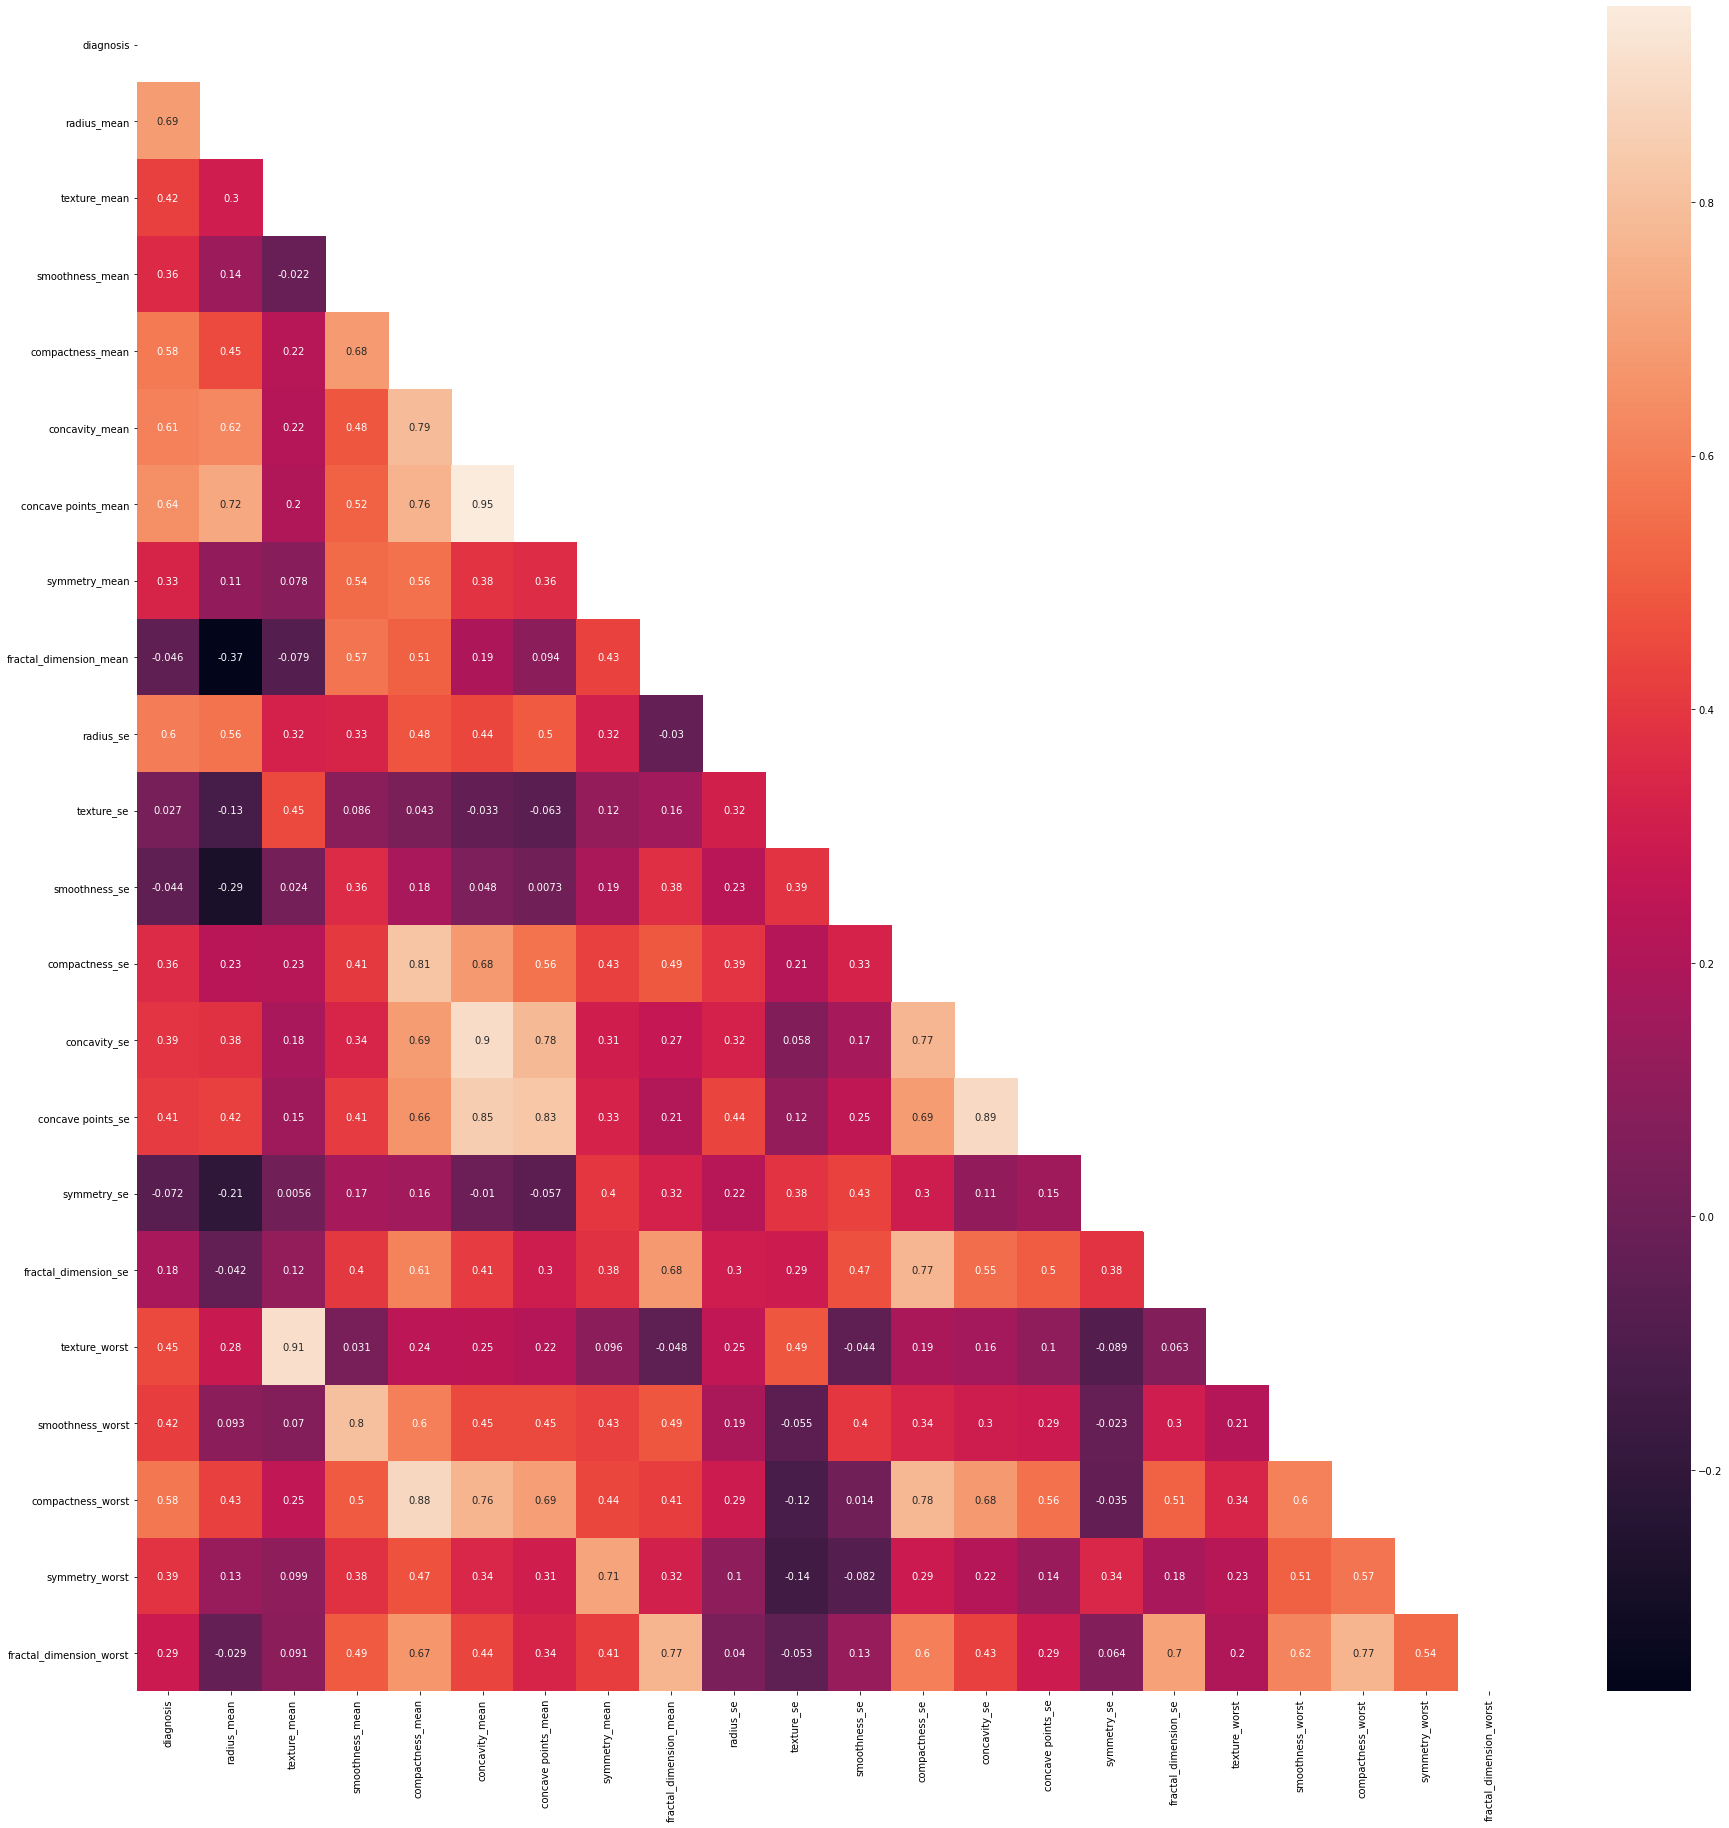

In [21]:
figure = plt.figure(figsize=(31,31))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, mask=matrix)

In [22]:
df.shape

(569, 22)

In [23]:
X = df.iloc[:, 1:22].values
Y = df.iloc[:, 0].values

def classification_evaluation(classifier, X, Y, classifier_name, columns):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    accuracy_arr = np.zeros(shape=(1,10))
    f1_score_arr = np.zeros(shape=(1,10))
    precision_arr = np.zeros(shape=(1,10))
    recall_arr = np.zeros(shape=(1,10))
    feature_importance_arr = np.zeros(shape=(1,21))
    time_arr = []
    

    cv = StratifiedKFold(n_splits=10)
    fig, ax = plt.subplots(figsize=(15, 10))
    start_time = time.time()
    for i, (train, test) in enumerate(cv.split(X, Y)):
        itr_start_time = time.time()
        classifier.fit(X[train], Y[train])
        itr_end_time = time.time()
        viz = plot_roc_curve(classifier, X[test], Y[test],
                             name=f'ROC fold {i}',
                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
        
        try:
            feature_importance_arr += classifier.feature_importances_
        except:
            try:
                feature_importance_arr += np.array([abs(i) for i in classifier.coef_[0]])
            except:
                feature_importance_arr += np.array([abs(i) for i in permutation_importance(classifier, X[test], Y[test]).importances_mean])
            
        
        predict = classifier.predict(X[test])
        accuracy = classifier.score(X[test], Y[test])
        accuracy_arr[0, i] = accuracy
        f1 = f1_score(predict, Y[test])
        f1_score_arr[0, i] = f1
        precision = precision_score(predict, Y[test])
        precision_arr[0, i] = precision
        recall = recall_score(predict, Y[test])
        recall_arr[0, i] = recall
        train, test = train, test
        time_arr.append(itr_end_time-itr_start_time)
        print(f"Fold-{i}:  accuracy: {accuracy}  f1-score: {f1}  precision: {precision}  recall: {recall}  time: {itr_end_time-itr_start_time}")
    end_time = time.time()
    
    print()
    print(f"Classification Report for {classifier_name}")
    print("Average Accuracy :", np.mean(accuracy_arr))
    print("Average F1-Score :", np.mean(f1_score_arr))
    print("Average Precision :", np.mean(precision_arr))
    print("Average Recall :", np.mean(recall_arr))
    print("Total Time :", end_time - start_time)
    
    fig = plt.figure(figsize=(15, 10))
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title=f"Receiver Operating Characteristic for {classifier_name}")
    ax.legend(loc="lower right")
    plt.show()
    
    feature_importance_arr /= 10
    
    fig = plt.figure(figsize=(15, 10))
    
    plt.subplot(1, 2, 1)
    feature_imp = pd.Series(feature_importance_arr[0], index = columns[1:22])
    feature_imp.nlargest(10).plot(kind = 'bar')
    plt.title(f"Feature Importance of {classifier_name}")
    
    
    plt.subplot(1,2,2)
    plt.plot(time_arr, 'go-', color="darkblue")
    plt.plot([max(time_arr) for i in range(10)], color='lightcoral', label='UL')
    plt.plot([min(time_arr) for i in range(10)], color='lightgreen', label='LL')
    plt.title("Training time for every iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Time in sec.")
    plt.legend(loc="upper right")
    
    plt.show()
    
    return np.mean(accuracy_arr), np.mean(f1_score_arr), np.mean(precision_arr), np.mean(recall_arr), mean_auc

Fold-0:  accuracy: 1.0  f1-score: 1.0  precision: 1.0  recall: 1.0  time: 0.012912988662719727
Fold-1:  accuracy: 0.9473684210526315  f1-score: 0.9302325581395349  precision: 0.9090909090909091  recall: 0.9523809523809523  time: 0.005955934524536133
Fold-2:  accuracy: 0.9824561403508771  f1-score: 0.975609756097561  precision: 0.9523809523809523  recall: 1.0  time: 0.007323026657104492
Fold-3:  accuracy: 0.9473684210526315  f1-score: 0.9268292682926829  precision: 0.9047619047619048  recall: 0.95  time: 0.011076211929321289
Fold-4:  accuracy: 0.9649122807017544  f1-score: 0.9523809523809523  precision: 0.9523809523809523  recall: 0.9523809523809523  time: 0.006007194519042969
Fold-5:  accuracy: 0.9649122807017544  f1-score: 0.9500000000000001  precision: 0.9047619047619048  recall: 1.0  time: 0.008473873138427734
Fold-6:  accuracy: 0.9649122807017544  f1-score: 0.9523809523809523  precision: 0.9523809523809523  recall: 0.9523809523809523  time: 0.010721921920776367
Fold-7:  accuracy: 1

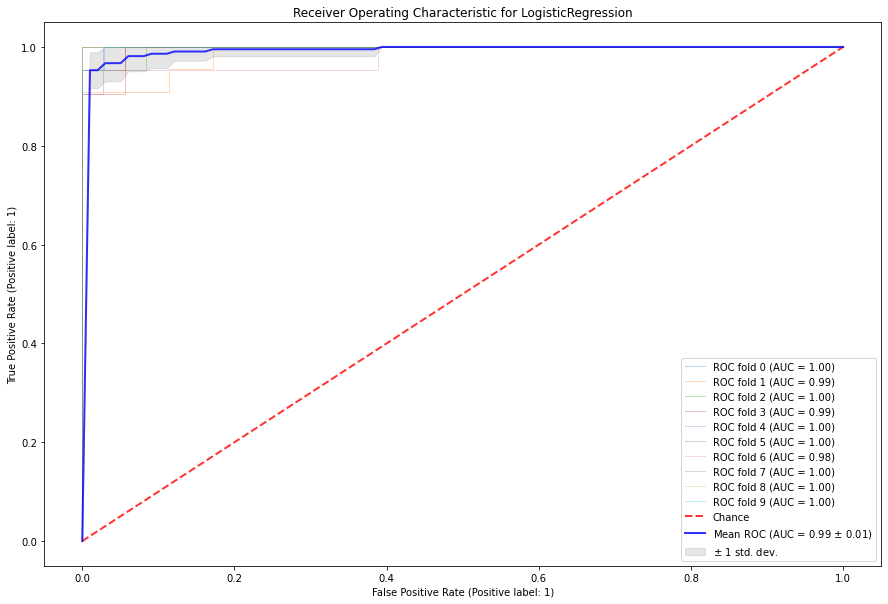

<Figure size 1080x720 with 0 Axes>

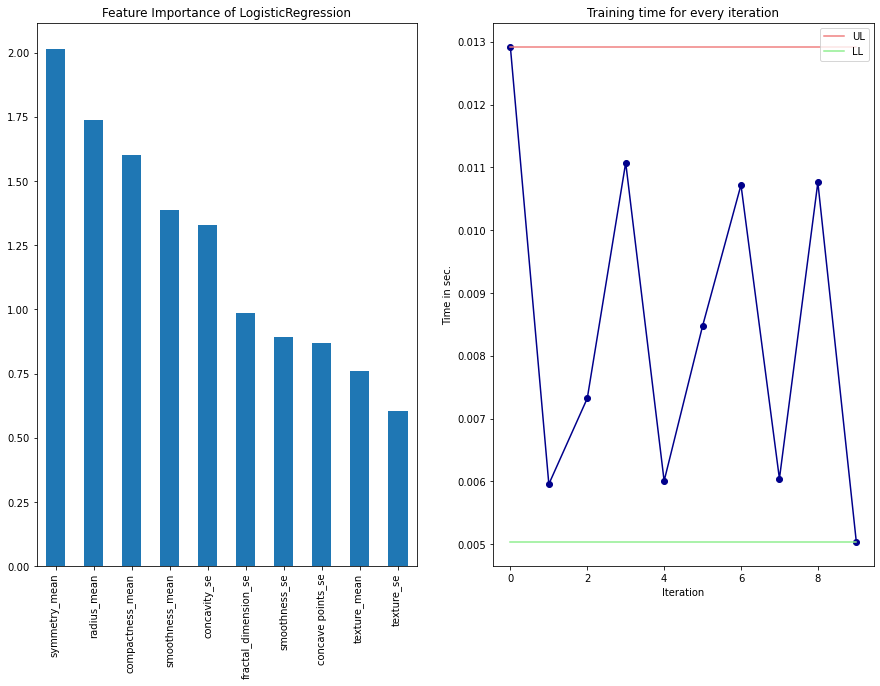

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.inspection import permutation_importance
classifier = LogisticRegression()
lr_acc, lr_f1, lr_precision, lr_recall, lr_auc = classification_evaluation(classifier, X, Y, "LogisticRegression", columns)


Fold-0:  accuracy: 0.9122807017543859  f1-score: 0.8936170212765958  precision: 0.9545454545454546  recall: 0.84  time: 0.00047206878662109375
Fold-1:  accuracy: 0.8596491228070176  f1-score: 0.8333333333333333  precision: 0.9090909090909091  recall: 0.7692307692307693  time: 0.0007731914520263672
Fold-2:  accuracy: 0.9122807017543859  f1-score: 0.8837209302325582  precision: 0.9047619047619048  recall: 0.8636363636363636  time: 0.0005960464477539062
Fold-3:  accuracy: 0.9122807017543859  f1-score: 0.8780487804878048  precision: 0.8571428571428571  recall: 0.9  time: 0.0005688667297363281
Fold-4:  accuracy: 0.9122807017543859  f1-score: 0.8780487804878048  precision: 0.8571428571428571  recall: 0.9  time: 0.0005619525909423828
Fold-5:  accuracy: 0.9298245614035088  f1-score: 0.9047619047619048  precision: 0.9047619047619048  recall: 0.9047619047619048  time: 0.0005578994750976562
Fold-6:  accuracy: 0.8421052631578947  f1-score: 0.7906976744186046  precision: 0.8095238095238095  recall:

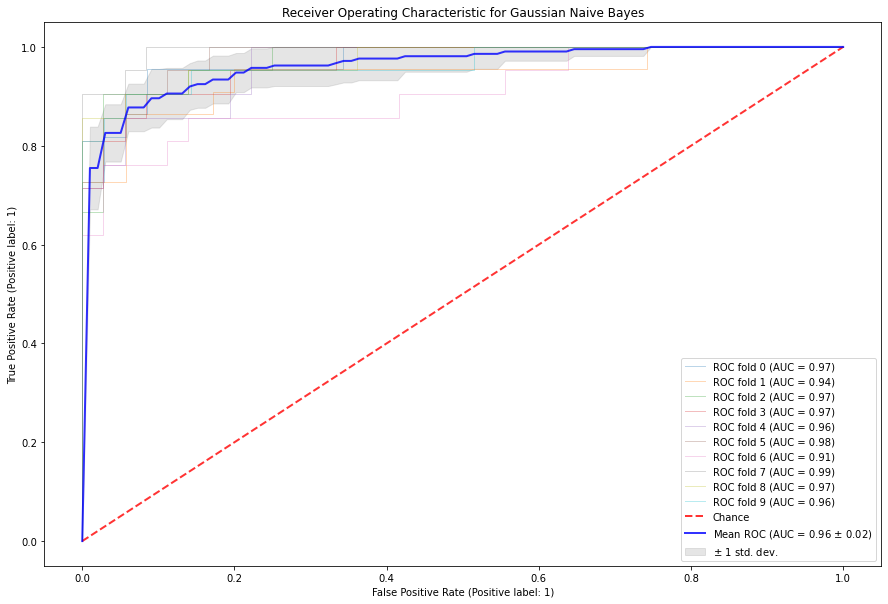

<Figure size 1080x720 with 0 Axes>

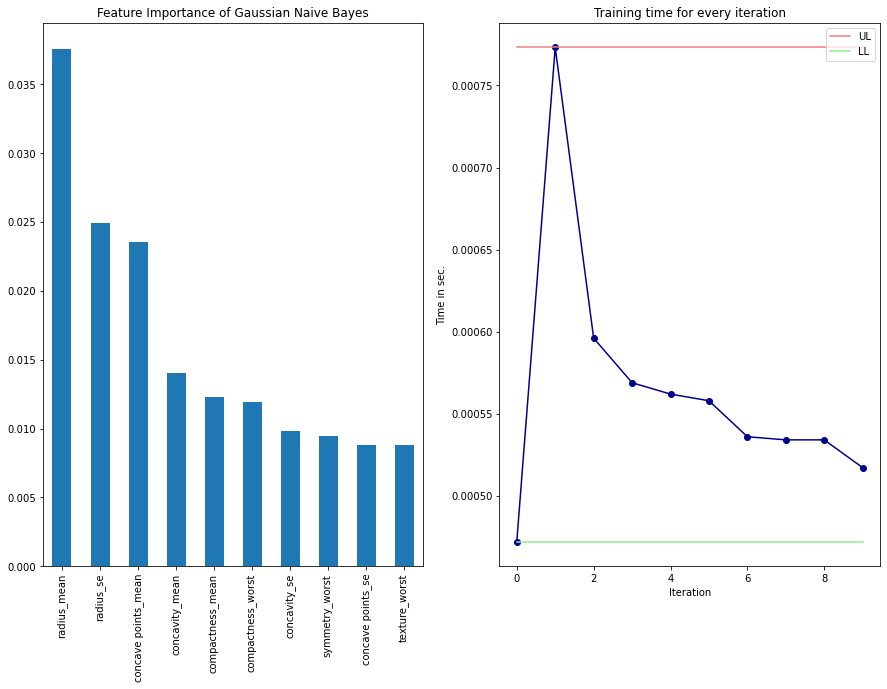

In [25]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
gn_acc, gn_f1, gn_precision, gn_recall, gn_auc = classification_evaluation(classifier, X, Y, "Gaussian Naive Bayes", list(df.columns))

Fold-0:  accuracy: 0.9824561403508771  f1-score: 0.9777777777777777  precision: 1.0  recall: 0.9565217391304348  time: 0.10724711418151855
Fold-1:  accuracy: 0.9122807017543859  f1-score: 0.8837209302325582  precision: 0.8636363636363636  recall: 0.9047619047619048  time: 0.10421895980834961
Fold-2:  accuracy: 0.9473684210526315  f1-score: 0.9268292682926829  precision: 0.9047619047619048  recall: 0.95  time: 0.10734176635742188
Fold-3:  accuracy: 0.9473684210526315  f1-score: 0.923076923076923  precision: 0.8571428571428571  recall: 1.0  time: 0.10379695892333984
Fold-4:  accuracy: 0.9473684210526315  f1-score: 0.923076923076923  precision: 0.8571428571428571  recall: 1.0  time: 0.10602903366088867
Fold-5:  accuracy: 0.9824561403508771  f1-score: 0.975609756097561  precision: 0.9523809523809523  recall: 1.0  time: 0.10513591766357422
Fold-6:  accuracy: 0.9298245614035088  f1-score: 0.9  precision: 0.8571428571428571  recall: 0.9473684210526315  time: 0.10500025749206543
Fold-7:  accur

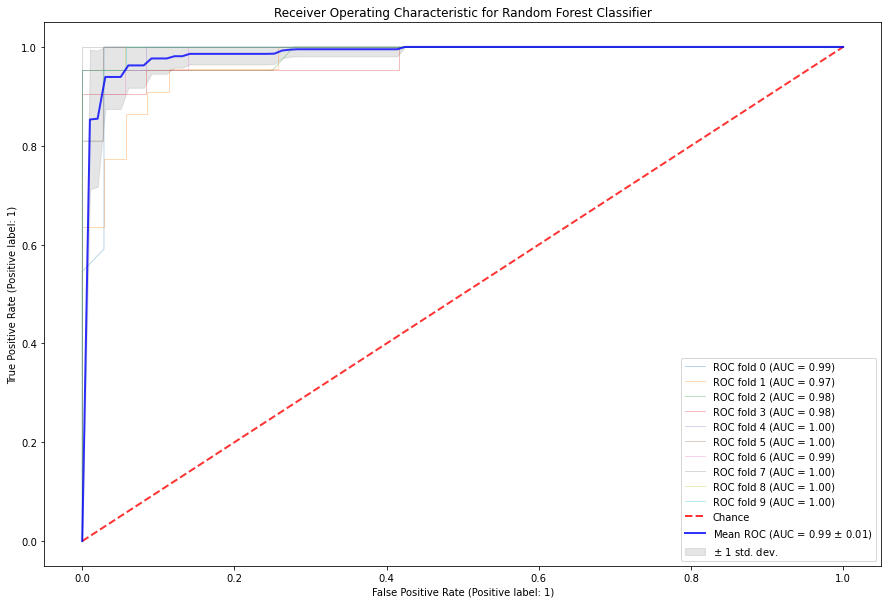

<Figure size 1080x720 with 0 Axes>

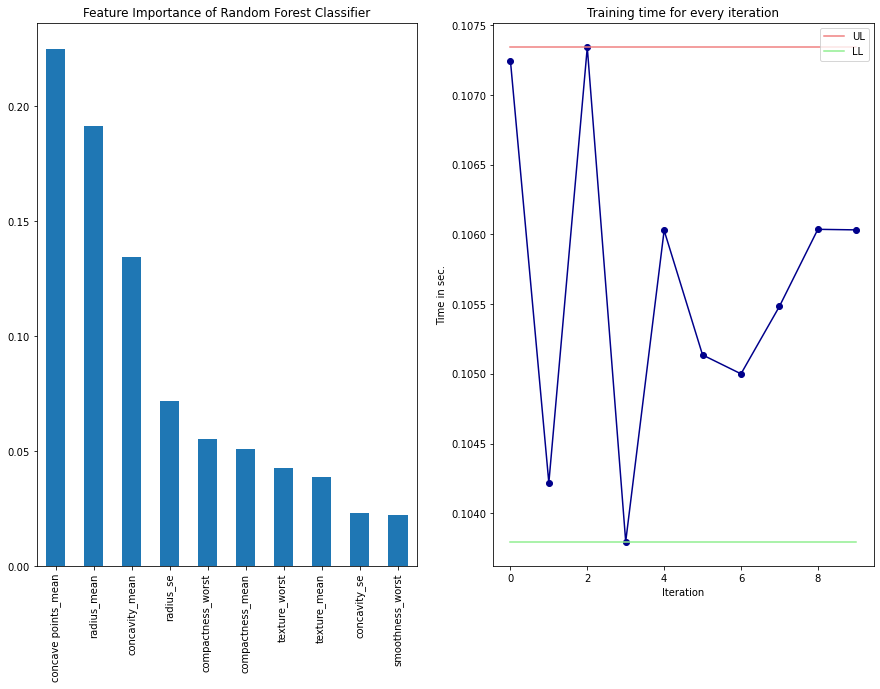

In [26]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100)
rf_acc, rf_f1, rf_precision, rf_recall, rf_auc = classification_evaluation(classifier, X, Y, "Random Forest Classifier", list(df.columns))

Fold-0:  accuracy: 0.9649122807017544  f1-score: 0.9545454545454546  precision: 0.9545454545454546  recall: 0.9545454545454546  time: 0.0002110004425048828
Fold-1:  accuracy: 0.9122807017543859  f1-score: 0.8780487804878049  precision: 0.8181818181818182  recall: 0.9473684210526315  time: 0.0003838539123535156
Fold-2:  accuracy: 0.9473684210526315  f1-score: 0.9268292682926829  precision: 0.9047619047619048  recall: 0.95  time: 0.0006430149078369141
Fold-3:  accuracy: 0.9824561403508771  f1-score: 0.975609756097561  precision: 0.9523809523809523  recall: 1.0  time: 0.0006039142608642578
Fold-4:  accuracy: 0.9473684210526315  f1-score: 0.923076923076923  precision: 0.8571428571428571  recall: 1.0  time: 0.00045990943908691406
Fold-5:  accuracy: 0.9473684210526315  f1-score: 0.923076923076923  precision: 0.8571428571428571  recall: 1.0  time: 0.0005161762237548828
Fold-6:  accuracy: 0.9298245614035088  f1-score: 0.9  precision: 0.8571428571428571  recall: 0.9473684210526315  time: 0.0003

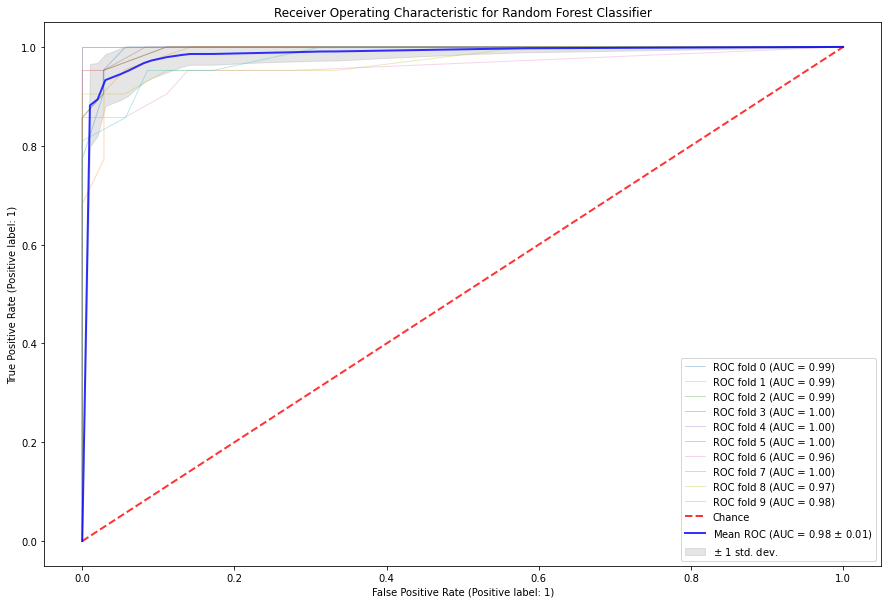

<Figure size 1080x720 with 0 Axes>

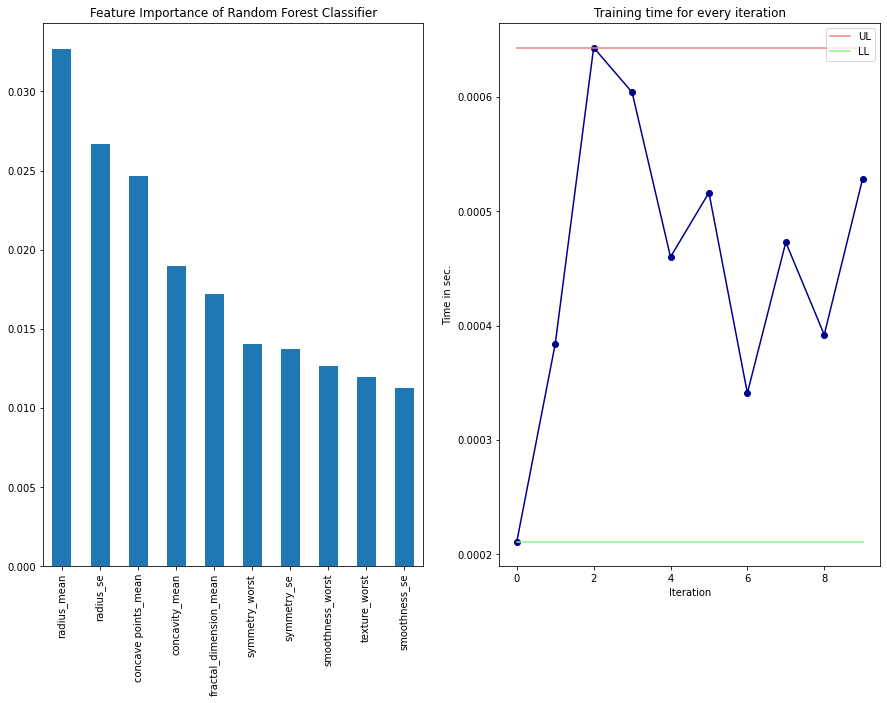

In [27]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=10)
kf_acc, kf_f1, kf_precision, kf_recall, kf_auc = classification_evaluation(classifier, X, Y, "Random Forest Classifier", list(df.columns))

Fold-0:  accuracy: 0.9649122807017544  f1-score: 0.9545454545454546  precision: 0.9545454545454546  recall: 0.9545454545454546  time: 0.06989598274230957
Fold-1:  accuracy: 0.9122807017543859  f1-score: 0.8837209302325582  precision: 0.8636363636363636  recall: 0.9047619047619048  time: 0.06553506851196289
Fold-2:  accuracy: 0.9473684210526315  f1-score: 0.9268292682926829  precision: 0.9047619047619048  recall: 0.95  time: 0.06760382652282715
Fold-3:  accuracy: 0.9649122807017544  f1-score: 0.9500000000000001  precision: 0.9047619047619048  recall: 1.0  time: 0.06836915016174316
Fold-4:  accuracy: 0.9649122807017544  f1-score: 0.9523809523809523  precision: 0.9523809523809523  recall: 0.9523809523809523  time: 0.06860804557800293
Fold-5:  accuracy: 0.9824561403508771  f1-score: 0.975609756097561  precision: 0.9523809523809523  recall: 1.0  time: 0.07025790214538574
Fold-6:  accuracy: 0.9298245614035088  f1-score: 0.9047619047619048  precision: 0.9047619047619048  recall: 0.90476190476

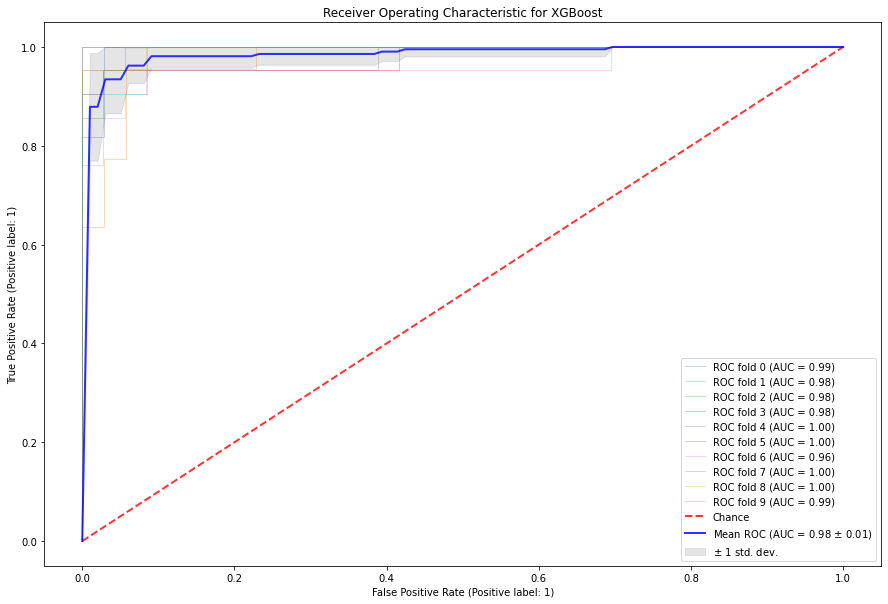

<Figure size 1080x720 with 0 Axes>

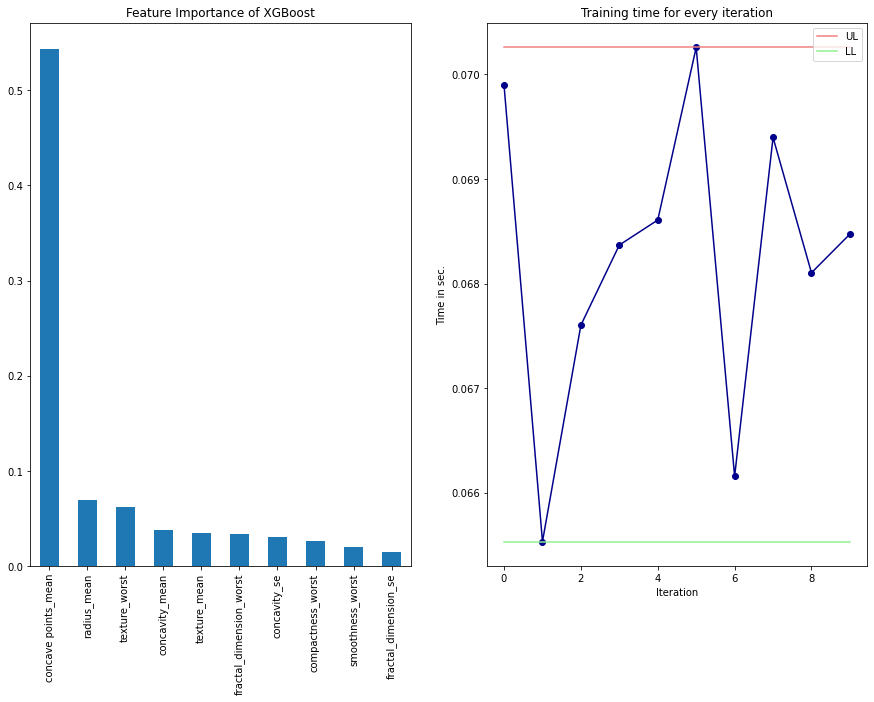

In [28]:
from xgboost import XGBClassifier

classifier = XGBClassifier(n_estimators=120, use_label_encoder=False, disable_default_eval_metric=1)
xg_acc, xg_f1, xg_precision, xg_recall, xg_auc = classification_evaluation(classifier, X, Y, "XGBoost", list(df.columns))